# 1.Importing all the libraries, that we will need in this process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# 2.Reading all the data from files.

In [2]:
train=pd.read_csv('C:/Users/Сергей/Desktop/CV/train.csv')
test=pd.read_csv('C:/Users/Сергей/Desktop/CV/test.csv')
sample_submission=pd.read_csv('C:/Users/Сергей/Desktop/CV/sample_submission.csv')
display(train)
display(test)
display(sample_submission)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


# 3.Creating vector of labels for data, using field 'label', and dropping this field out of DataFrame.

In [3]:
y_train=train['label']
train=train.drop(['label'],axis=1)
display(train)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4.Reshaping samples with aim of getting matrix 28x28 instead of vector, which length is 784(it is apropriate format for CNN model).

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,188,255,94,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,191,250,253,93,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,123,248,253,167,10,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,247,253,208,13,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,253,235,77,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,253,88,0,0,0,0,0,0,0,0


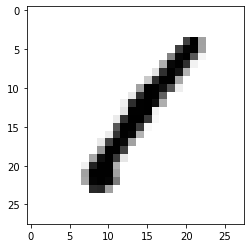

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,35,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,48,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,60,...,207,197,46,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,213,...,253,253,223,52,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,66,...,244,253,253,134,3,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,205,253,253,253,15,0,0,0,0,0


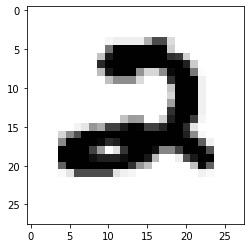

In [4]:
X_train=np.empty(shape=(train.shape[0],28,28),dtype=int)
X_test=np.empty(shape=(test.shape[0],28,28),dtype=int)
for i in range(train.shape[0]):
    X_train[i]=np.reshape((train.loc[i,:].copy()).to_numpy(),(28,28))
for i in range(test.shape[0]):
    X_test[i]=np.reshape((test.loc[i,:].copy()).to_numpy(),(28,28))
display(pd.DataFrame(X_train[0]))
plt.imshow(X_train[0],cmap='gray_r')
plt.show()
display(pd.DataFrame(X_test[0]))
plt.imshow(X_test[0],cmap='gray_r')
plt.show()

# 5.Transforming labels into vector with 10 coordinates, where all they, except one, equal to 0, and another equal 1(it is more aproprite format, as long as we are going to use softmax activation function for output layer).

In [5]:
Y_train=np.zeros(shape=(train.shape[0],10),dtype=int)
for i in range(train.shape[0]):
    Y_train[i,y_train[i]]=1
print(Y_train[0,:])

[0 1 0 0 0 0 0 0 0 0]


# 6.Separating our 'train' data into train sample and validation sample. 

In [7]:
X_train_,X_val_,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=1/21,random_state=0)
X_train=X_train_
X_val=X_val_
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(40000, 28, 28)
(2000, 28, 28)
(40000, 10)
(2000, 10)


# 7.Building CNN model.

In [8]:
epochs_=400
def model():
    In=tf.keras.Input(shape=(28,28,1))
    A1=tf.keras.layers.Conv2D(filters=3,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu')(In)
    P1=tf.keras.layers.AvgPool2D(pool_size=(3,3),strides=(1,1),padding='valid')(A1)
    A2=tf.keras.layers.Conv2D(filters=7,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu')(P1)
    P2=tf.keras.layers.AvgPool2D(pool_size=(2,2),strides=(2,2),padding='valid')(A2)
    F=tf.keras.layers.Flatten()(P2)
    FC1=tf.keras.layers.Dense(units=400,activation='relu')(F)
    FC2=tf.keras.layers.Dense(units=150,activation='relu')(FC1)
    Out=tf.keras.layers.Dense(units=10,activation='softmax')(FC2)
    model=tf.keras.Model(inputs=In,outputs=Out,name='Digit_recognizer_2.0.')
    return model
CNN=model()
CNN.summary()
CNN.compile(optimizer='Adagrad',loss='categorical_crossentropy',metrics=['accuracy'])
X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(Y_train)
X_val=tf.convert_to_tensor(X_val)
y_val=tf.convert_to_tensor(Y_val)
train_data=tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(64)
val_data=tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(64)
history=CNN.fit(train_data,epochs=epochs_,validation_data=val_data)

Model: "Digit_recognizer_2.0."
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 average_pooling2d (AverageP  (None, 24, 24, 3)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 7)         196       
                                                                 
 average_pooling2d_1 (Averag  (None, 11, 11, 7)        0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 847)     

625/625 [==============================] - 10s 16ms/step - loss: 0.0113 - accuracy: 0.9984 - val_loss: 0.1797 - val_accuracy: 0.9660
Epoch 46/400
625/625 [==============================] - 10s 16ms/step - loss: 0.0110 - accuracy: 0.9985 - val_loss: 0.1796 - val_accuracy: 0.9660
Epoch 47/400
625/625 [==============================] - 9s 15ms/step - loss: 0.0106 - accuracy: 0.9986 - val_loss: 0.1797 - val_accuracy: 0.9655
Epoch 48/400
625/625 [==============================] - 9s 14ms/step - loss: 0.0103 - accuracy: 0.9987 - val_loss: 0.1796 - val_accuracy: 0.9655
Epoch 49/400
625/625 [==============================] - 9s 15ms/step - loss: 0.0100 - accuracy: 0.9987 - val_loss: 0.1795 - val_accuracy: 0.9650
Epoch 50/400
625/625 [==============================] - 9s 15ms/step - loss: 0.0097 - accuracy: 0.9988 - val_loss: 0.1794 - val_accuracy: 0.9660
Epoch 51/400
625/625 [==============================] - 9s 15ms/step - loss: 0.0094 - accuracy: 0.9989 - val_loss: 0.1797 - val_accuracy: 0.9

625/625 [==============================] - 8s 13ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.1790 - val_accuracy: 0.9690
Epoch 102/400
625/625 [==============================] - 8s 13ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.1790 - val_accuracy: 0.9690
Epoch 103/400
625/625 [==============================] - 8s 13ms/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.1791 - val_accuracy: 0.9690
Epoch 104/400
625/625 [==============================] - 8s 13ms/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.1791 - val_accuracy: 0.9690
Epoch 105/400
625/625 [==============================] - 8s 13ms/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.1792 - val_accuracy: 0.9695
Epoch 106/400
625/625 [==============================] - 9s 14ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.1793 - val_accuracy: 0.9695
Epoch 107/400
625/625 [==============================] - 8s 14ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.1793 - val_accuracy:

625/625 [==============================] - 9s 14ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1812 - val_accuracy: 0.9715
Epoch 158/400
625/625 [==============================] - 9s 14ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1813 - val_accuracy: 0.9715
Epoch 159/400
625/625 [==============================] - 9s 14ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1813 - val_accuracy: 0.9715
Epoch 160/400
625/625 [==============================] - 9s 14ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1813 - val_accuracy: 0.9715
Epoch 161/400
625/625 [==============================] - 9s 14ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1813 - val_accuracy: 0.9715
Epoch 162/400
625/625 [==============================] - 9s 14ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1814 - val_accuracy: 0.9715
Epoch 163/400
625/625 [==============================] - 9s 14ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1814 - val_accuracy:

625/625 [==============================] - 9s 15ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1830 - val_accuracy: 0.9715
Epoch 214/400
625/625 [==============================] - 9s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1830 - val_accuracy: 0.9715
Epoch 215/400
625/625 [==============================] - 9s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1830 - val_accuracy: 0.9715
Epoch 216/400
625/625 [==============================] - 9s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1830 - val_accuracy: 0.9715
Epoch 217/400
625/625 [==============================] - 9s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1831 - val_accuracy: 0.9715
Epoch 218/400
625/625 [==============================] - 10s 15ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1831 - val_accuracy: 0.9715
Epoch 219/400
625/625 [==============================] - 9s 15ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1831 - val_accuracy

Epoch 269/400
625/625 [==============================] - 9s 14ms/step - loss: 9.2733e-04 - accuracy: 1.0000 - val_loss: 0.1847 - val_accuracy: 0.9710
Epoch 270/400
625/625 [==============================] - 8s 14ms/step - loss: 9.2296e-04 - accuracy: 1.0000 - val_loss: 0.1847 - val_accuracy: 0.9710
Epoch 271/400
625/625 [==============================] - 9s 14ms/step - loss: 9.1887e-04 - accuracy: 1.0000 - val_loss: 0.1847 - val_accuracy: 0.9710
Epoch 272/400
625/625 [==============================] - 9s 14ms/step - loss: 9.1445e-04 - accuracy: 1.0000 - val_loss: 0.1848 - val_accuracy: 0.9710
Epoch 273/400
625/625 [==============================] - 9s 14ms/step - loss: 9.1037e-04 - accuracy: 1.0000 - val_loss: 0.1848 - val_accuracy: 0.9710
Epoch 274/400
625/625 [==============================] - 9s 14ms/step - loss: 9.0611e-04 - accuracy: 1.0000 - val_loss: 0.1848 - val_accuracy: 0.9710
Epoch 275/400
625/625 [==============================] - 9s 14ms/step - loss: 9.0216e-04 - accuracy:

625/625 [==============================] - 8s 13ms/step - loss: 7.3776e-04 - accuracy: 1.0000 - val_loss: 0.1863 - val_accuracy: 0.9725
Epoch 324/400
625/625 [==============================] - 8s 13ms/step - loss: 7.3488e-04 - accuracy: 1.0000 - val_loss: 0.1863 - val_accuracy: 0.9725
Epoch 325/400
625/625 [==============================] - 8s 13ms/step - loss: 7.3217e-04 - accuracy: 1.0000 - val_loss: 0.1864 - val_accuracy: 0.9725
Epoch 326/400
625/625 [==============================] - 8s 13ms/step - loss: 7.2931e-04 - accuracy: 1.0000 - val_loss: 0.1864 - val_accuracy: 0.9725
Epoch 327/400
625/625 [==============================] - 8s 13ms/step - loss: 7.2649e-04 - accuracy: 1.0000 - val_loss: 0.1864 - val_accuracy: 0.9725
Epoch 328/400
625/625 [==============================] - 8s 13ms/step - loss: 7.2378e-04 - accuracy: 1.0000 - val_loss: 0.1865 - val_accuracy: 0.9725
Epoch 329/400
625/625 [==============================] - 8s 14ms/step - loss: 7.2117e-04 - accuracy: 1.0000 - val_

625/625 [==============================] - 9s 14ms/step - loss: 6.0919e-04 - accuracy: 1.0000 - val_loss: 0.1877 - val_accuracy: 0.9730
Epoch 378/400
625/625 [==============================] - 9s 14ms/step - loss: 6.0724e-04 - accuracy: 1.0000 - val_loss: 0.1877 - val_accuracy: 0.9730
Epoch 379/400
625/625 [==============================] - 9s 14ms/step - loss: 6.0520e-04 - accuracy: 1.0000 - val_loss: 0.1877 - val_accuracy: 0.9730
Epoch 380/400
625/625 [==============================] - 9s 14ms/step - loss: 6.0322e-04 - accuracy: 1.0000 - val_loss: 0.1878 - val_accuracy: 0.9730
Epoch 381/400
625/625 [==============================] - 9s 14ms/step - loss: 6.0128e-04 - accuracy: 1.0000 - val_loss: 0.1878 - val_accuracy: 0.9730
Epoch 382/400
625/625 [==============================] - 9s 14ms/step - loss: 5.9935e-04 - accuracy: 1.0000 - val_loss: 0.1878 - val_accuracy: 0.9730
Epoch 383/400
625/625 [==============================] - 9s 14ms/step - loss: 5.9748e-04 - accuracy: 1.0000 - val_

# 8.Printing graphics of accuracy and loss.

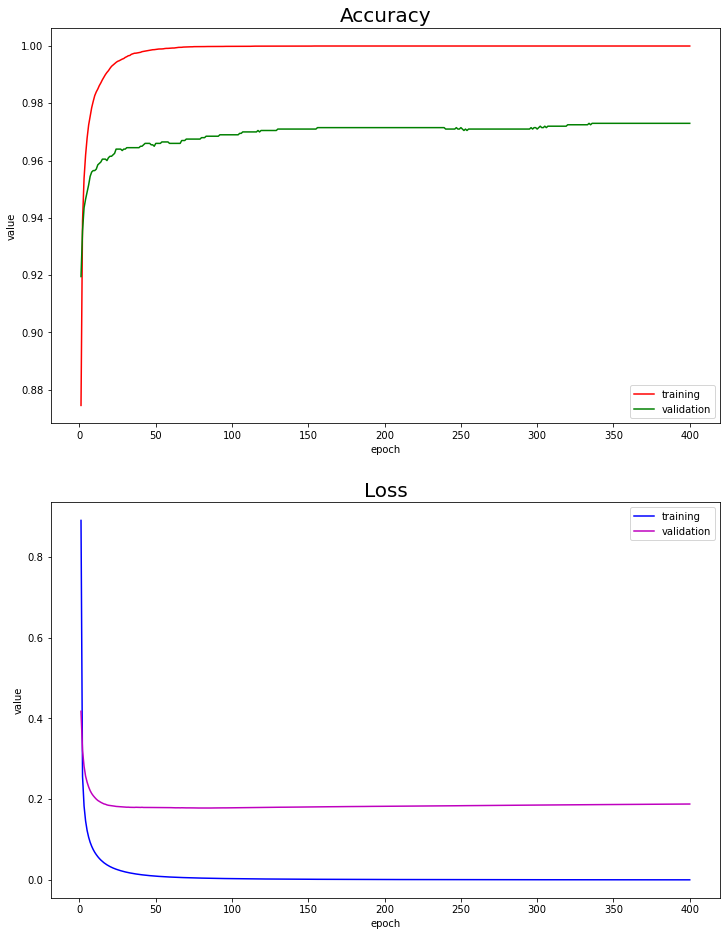

In [9]:
history_=pd.DataFrame(history.history)
acc_tr=history_['accuracy']
acc_val=history_['val_accuracy']
ls_tr=history_['loss']
ls_val=history_['val_loss']
fig=plt.figure(figsize=(12,16))
ax1=fig.add_subplot(2,1,1)
epochs=np.arange(1,epochs_+1)
ax1.plot(epochs,acc_tr,color='r',label='training')
ax1.plot(epochs,acc_val,color='g',label='validation')
ax1.set_xlabel('epoch')
ax1.set_ylabel('value')
ax1.set_title('Accuracy',fontsize=20)
ax1.legend(loc='lower right')
ax2=fig.add_subplot(2,1,2)
epochs=np.arange(1,epochs_+1)
ax2.plot(epochs,ls_tr,color='b',label='training')
ax2.plot(epochs,ls_val,color='m',label='validation')
ax2.set_xlabel('epoch')
ax2.set_ylabel('value')
ax2.set_title('Loss',fontsize=20)
ax2.legend(loc='upper right')
plt.show()

# 9.Printing confusion matrix for model on validation set.

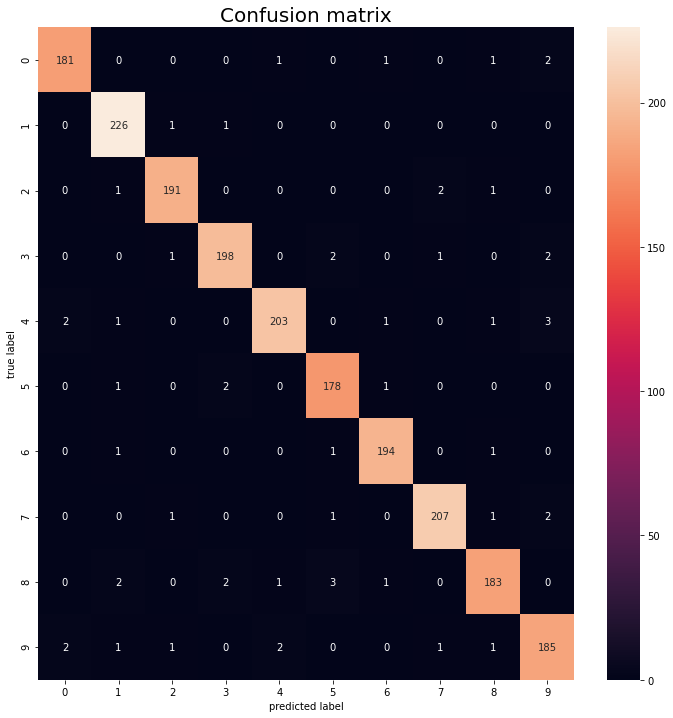

In [10]:
y_val_pred=CNN.predict(X_val).argmax(axis=1)
cm=confusion_matrix(np.argmax(y_val,axis=1),y_val_pred)
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(1,1,1)
ax.set_title('Confusion matrix',fontsize=20)
sns.heatmap(cm,annot=True,cbar=True,fmt='d')
ax.set_xlabel('predicted label')
ax.set_ylabel('true label')
plt.show()

# 10.Printing first hundred digits from test sample with predicted labels for pre-estimating of how CNN is working.

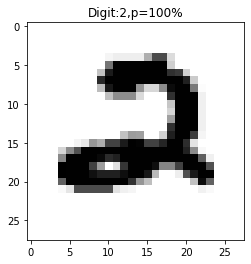

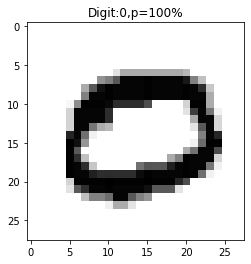

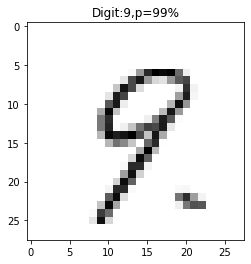

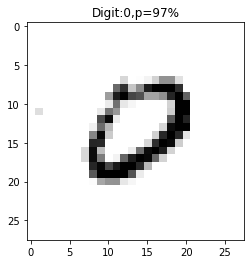

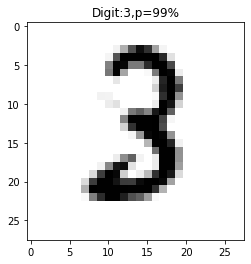

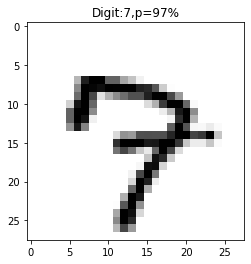

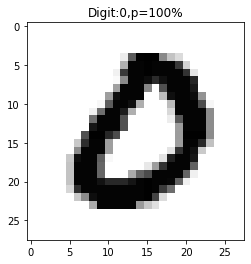

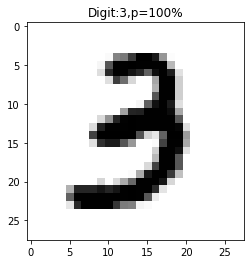

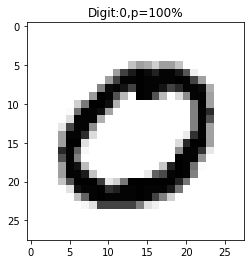

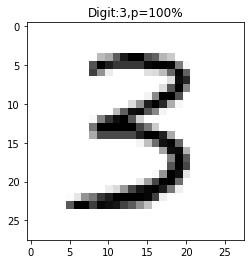

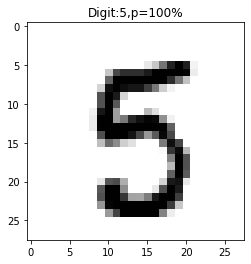

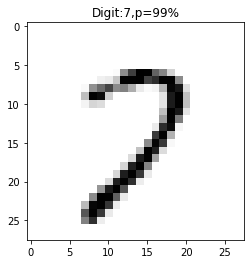

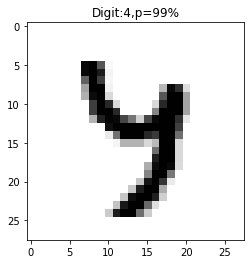

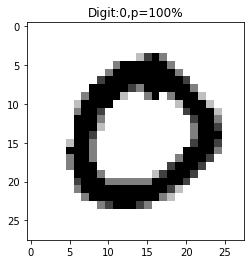

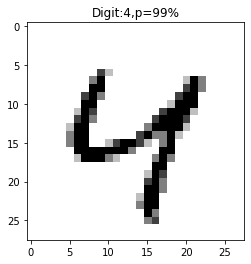

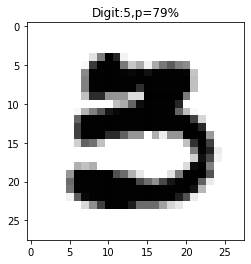

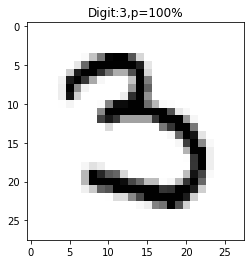

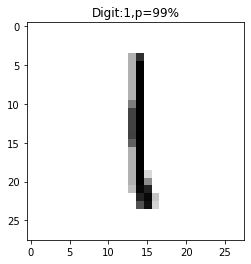

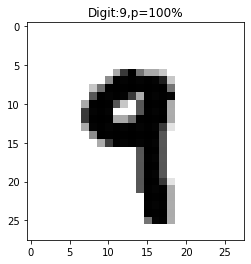

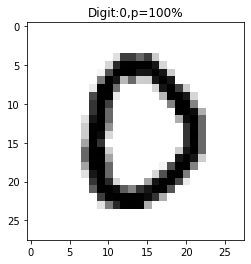

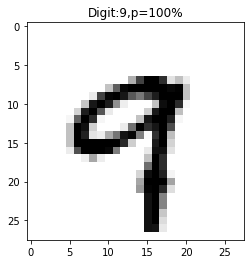

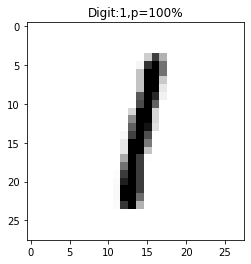

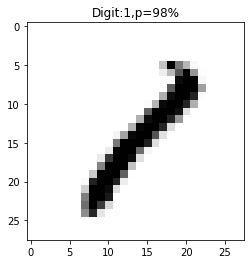

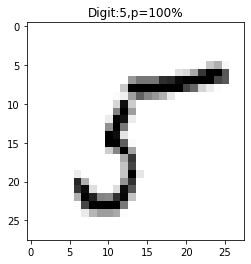

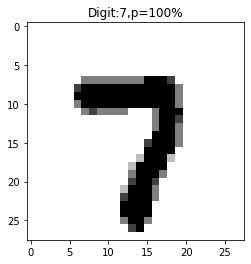

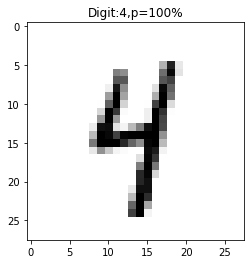

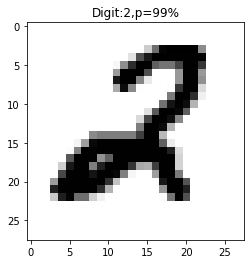

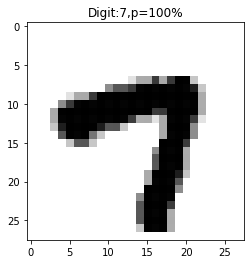

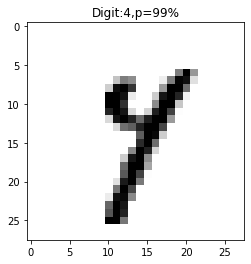

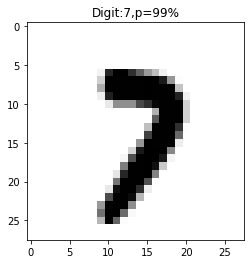

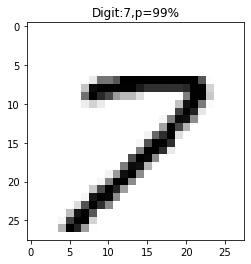

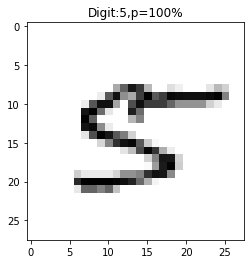

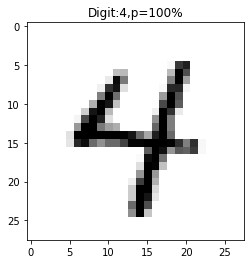

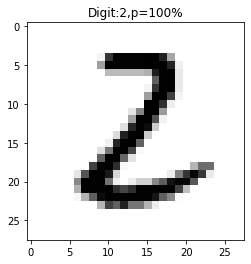

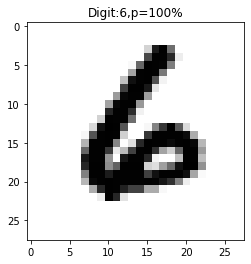

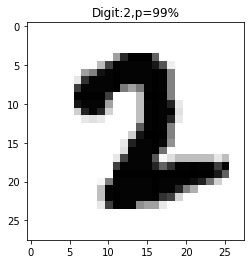

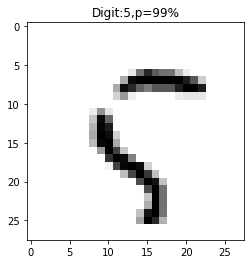

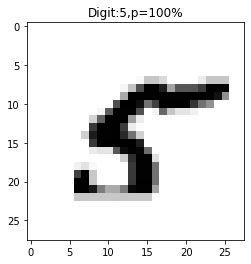

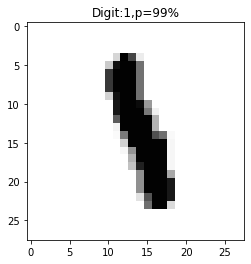

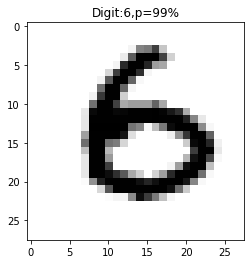

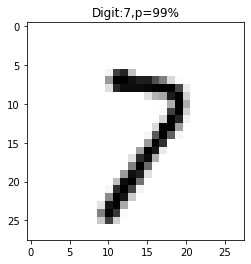

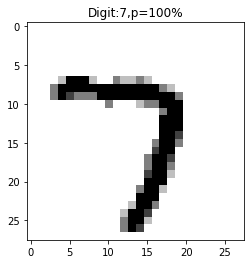

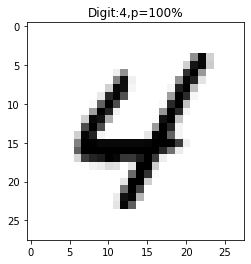

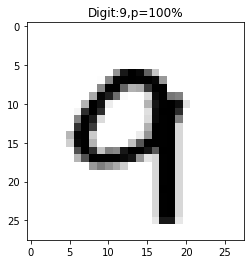

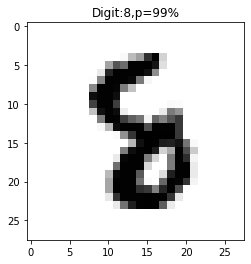

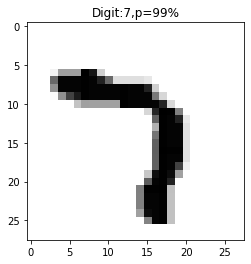

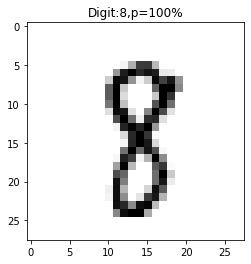

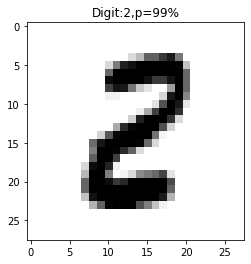

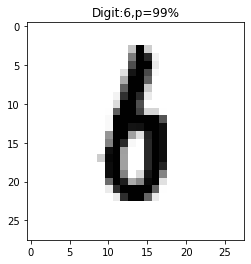

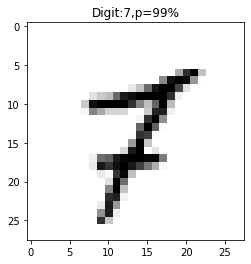

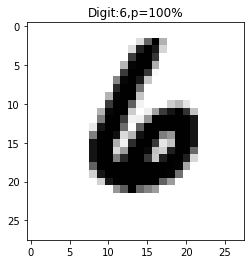

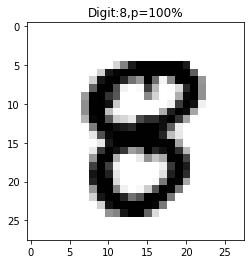

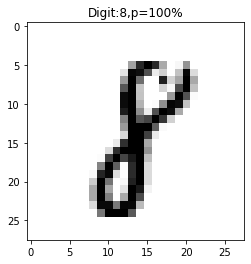

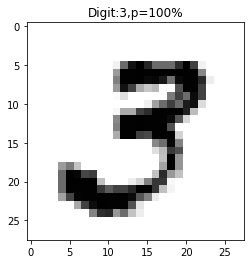

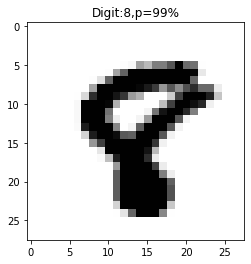

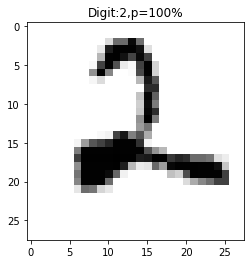

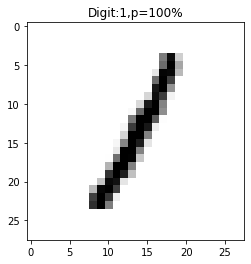

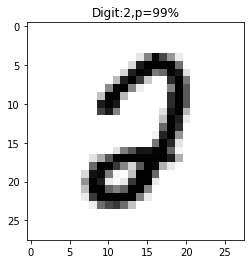

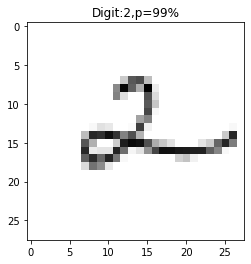

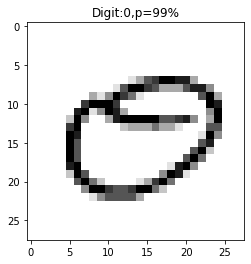

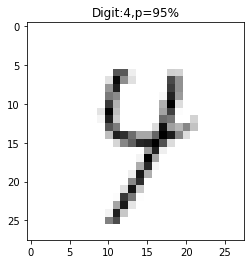

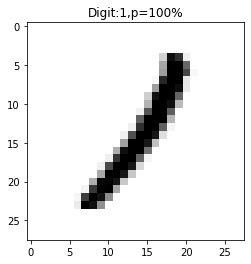

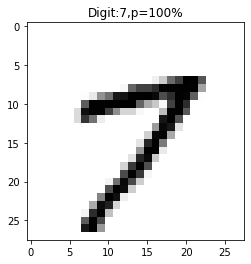

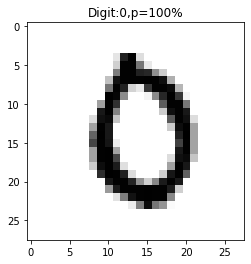

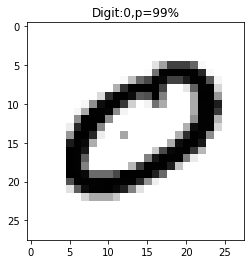

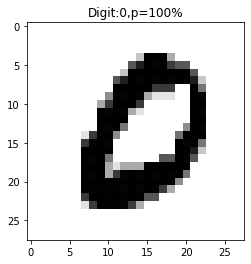

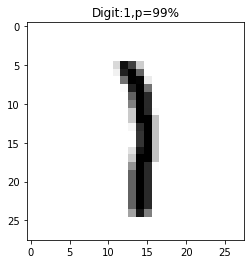

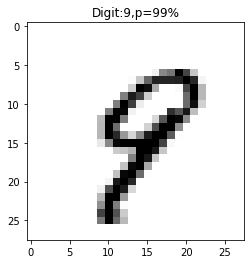

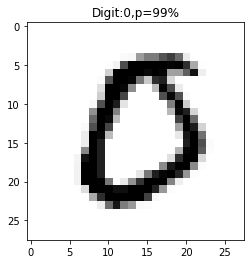

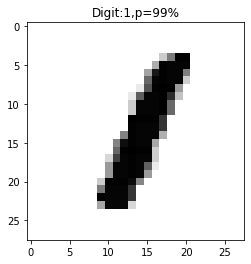

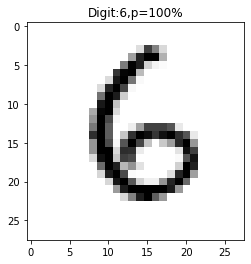

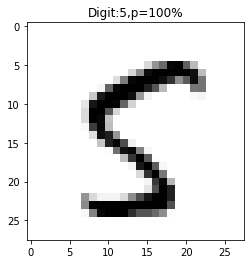

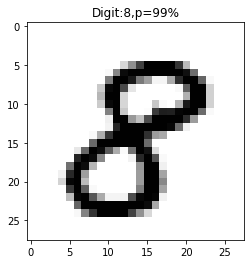

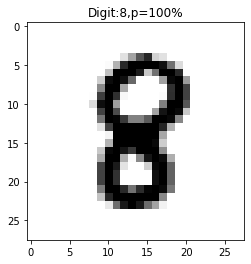

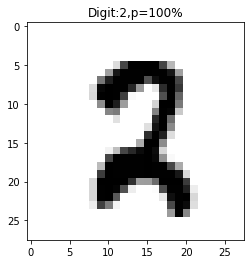

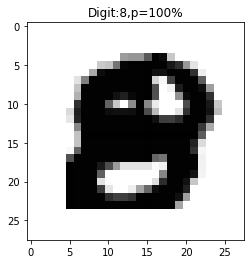

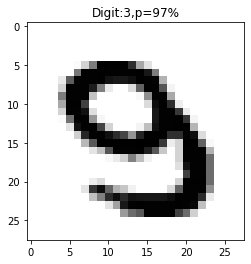

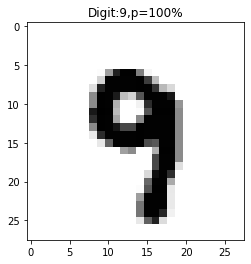

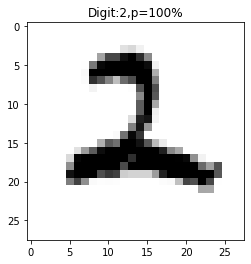

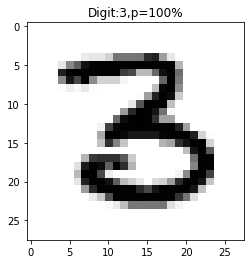

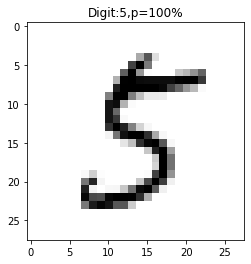

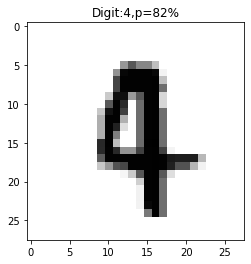

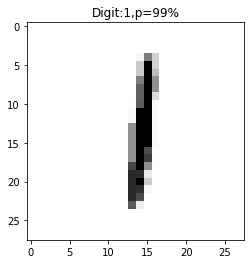

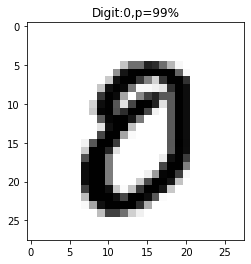

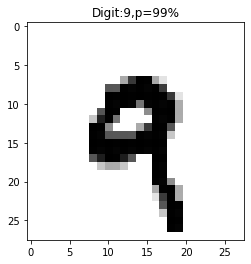

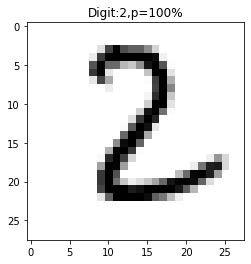

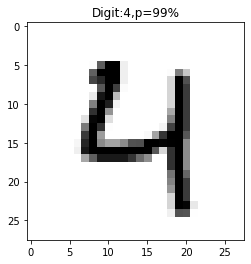

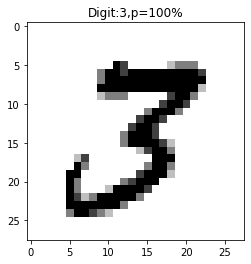

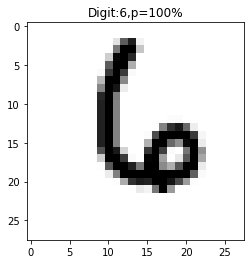

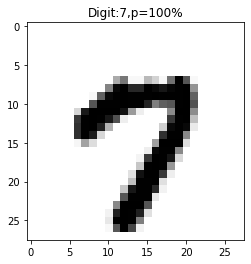

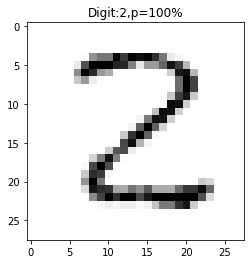

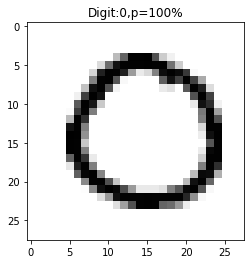

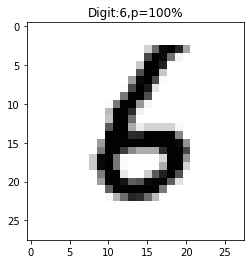

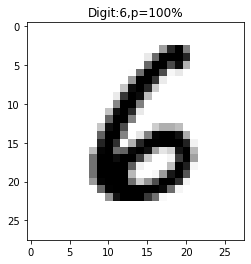

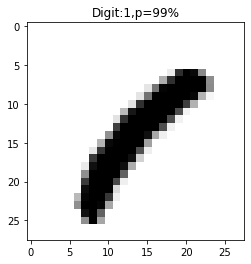

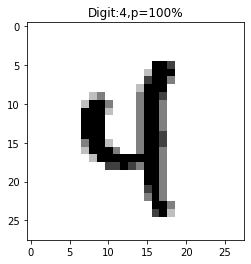

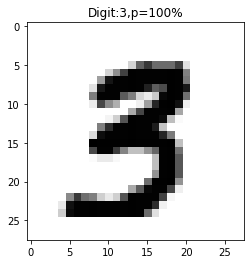

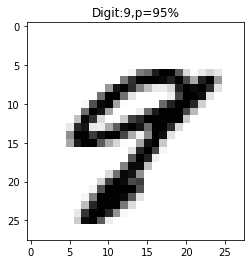

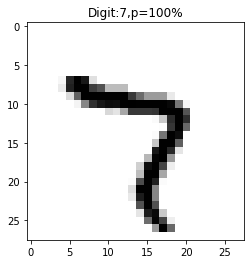

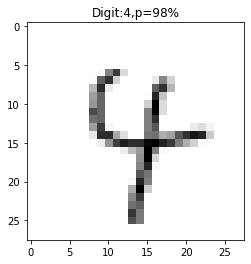

In [11]:
y_pred=CNN.predict(X_test)
for k in range(100):
    img_mat=X_test[k].copy()
    plt.imshow(img_mat,cmap='gray_r')
    plt.title(f'Digit:{np.argmax(y_pred[k,:])},p={int(100*y_pred[k,np.argmax(y_pred[k,:])])}%')
    plt.show()

# 11.Writing predictions into .csv file.

In [12]:
y_pred_=np.empty((len(y_pred)),dtype=int)
for i in range(len(y_pred)):
    y_pred_[i]=np.argmax(y_pred[i,:])
predictions=pd.DataFrame({'ImageId':sample_submission['ImageId'],'Label':y_pred_})
display(predictions)
filename='Digits.csv'
predictions.to_csv(filename,index=False)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
